### Supervised Learning
Linear Regression <br>
Logistic Regression

#### 逻辑回归与线性回归的联系与区别: <br>
- 区别：线性回归预测的是连续值（比如预测气温、房价等），逻辑回归预测的是离散值（即做分类问题，如区分好瓜坏瓜、区分鸟的种类等）<br>
- 联系：可以看到，逻辑回归与线性回归有相同的部分，就是线性模型y=wx+b,而不同的是逻辑回归通过了一个非线性的sigmoid函数将线性模型输出的结果压缩到了0和1之间，并且将线性模型输出大于0的值从下迅速压缩到1，将线性模型输出小于0的值从上迅速压缩到0，从而将一个预测连续值得模型变成了预测离散值得分类模型，所以实质上逻辑回归模型就是对特征进行线性分析预测（次数与线性回归模型一致），再建立线性分析预测到分类标签的非线性映射。

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Linear():
    def __init__(self, x, y, lr):
        """ 
        x: input feaures, 1 dimension
        y: input labels, 1 dimension
        lr: learning rate
        """
        x = np.array(x).reshape(-1, 1)
        self.x = np.hstack((x, np.ones((x.shape[0], 1)))) # (batch_size, 2), np.stack:横向拼接
        self.y = np.array(y).reshape(-1, 1)  # (batch_size, 1)
        self.w = (np.random.random(2).reshape(1, 2) - 0.5) * 2
        self.lr = lr
    
    def forward(self):        # inference, test, predict, same thing. Run model after training
        pred_y = np.dot(self.x, self.w.T) # (batch_size, 1)
        return pred_y
    
    def optimize_parameters(self):
        # forward
        pred_y = self.forward()
        # backward
        diff = pred_y - self.y # (batch_size, 1)
        dw = diff * self.x # broadcast: (batch_size, 1)*(batch_size, 2)=(batch_size, 1) 
        self.w -= self.lr * np.average(dw, 0) # (1,2)
     
    def get_loss(self):
        loss = 0.5 * (self.forward() - self.y) ** 2
        avg_loss = np.average(loss)
        return avg_loss
    
    def get_params(self):
        return self.w[0]  # [self.w[0,0], self.w[0,1]]


In [3]:
def train(model, epoch):
    epoch = epoch
    loss_list = []
    model = model
    
    for i in range(epoch):
        model.optimize_parameters()
        loss_list.append(model.get_loss())
        # backward
        if i%50 == 0:
            params = model.get_params()
            print('parameters{0}'.format(params))
            print('loss is {0}'.format(model.get_loss()))
     
    return loss_list

In [4]:
def get_linear_sample_data():
    w = random.randint(0, 10) + random.random()		# for noise random.random[0, 1)
    b = random.randint(0, 5) + random.random()
    #print(w, b)
    num_samples = 100
    x_list = np.linspace(-4, 4, num_samples)
    y_list = b + w*x_list + np.random.uniform(-1, 1, num_samples)
    return x_list, y_list, w, b  

5.476877365487493 1.6467467618794327
parameters[0.60269986 0.96743823]
loss is 64.97670132595397
parameters[1.76637641 0.99599692]
loss is 37.7839890721979
parameters[2.65222231 1.02316211]
loss is 22.020567329387422
parameters[3.32657032 1.04900179]
loss is 12.880899408617502
parameters[3.83991608 1.07358063]
loss is 7.58013925665517
parameters[4.23069927 1.09696017]
loss is 4.504431188742276
parameters[4.52818201 1.11919892]
loss is 2.718510011922317
parameters[4.75464001 1.14035254]
loss is 1.6803559823463603
parameters[4.92703061 1.16047399]
loss is 1.0758376221902497
parameters[5.05826252 1.17961362]
loss is 0.7228872719651855


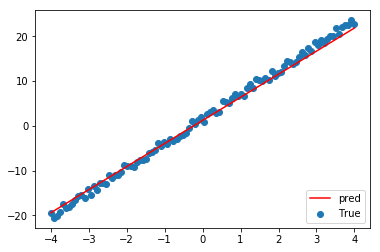

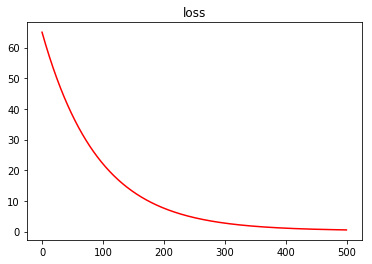

In [5]:
x_list, y_list, w, b = get_linear_sample_data()
print(w,b)
lr = 0.001
epoch = 500
Linear_model = Linear(x_list, y_list, lr)
loss_list = train(Linear_model, epoch)

y_pred = Linear_model.forward()
plt.figure()
plt.scatter(x_list,y_list, label='True')
plt.plot(x_list, y_pred, 'r', label='pred')
plt.legend(loc='lower right')
plt.show()
    
plt.figure()
plt.plot(np.arange(epoch), loss_list, 'r')
plt.title('loss')
plt.show()

In [6]:
class Logistic():
    def __init__(self, x, y, lr):
        """
        x: input features, 2 dimension
        y: inout labels, 1 dimension
        lr: learning rate
        """
        x = np.array(x).reshape(-1, 2)
        self.x = np.hstack((x, np.zeros((x.shape[0], 1)))) # (batch_size, 3)
        self.y = np.array(y).reshape(-1,1)    # (batxh_size, 1)
        self.w = (np.random.random(3).reshape(1,3) - 0.5) * 2 # (1, 3)
        self.lr = lr
    
    def forward(self):
        pred_y = self._sigmoid(np.dot(self.x, self.w.T))  # (batch_size, 1)
        return pred_y
    
    def plot_forward(self, x):
        w = self.get_params()
        a = -(w[0]/w[1])
        b = -(w[2]/w[1])
        return a*x + b
    
    def optimize_parameters(self):
        # forward
        pred_y = self.forward() # (batch_size, 1)
        # backward
        diff = pred_y - self.y   # (batch_size, 1)
        dw = diff * self.x  # (baich_size, 3)
        self.w -= self.lr * np.average(dw, 0)
    
    def get_loss(self):
        # pred_y与y的交叉熵
        pred_y = self.forward()
        loss = self.y * np.log(pred_y) + (1-self.y) * np.log(1- pred_y)
        avg_loss = np.average(loss)
        return avg_loss
    
    def get_params(self):
        return self.w[0]
    
    def _sigmoid(self, x):
         return 1 / (1 + np.exp(-x))
        

In [12]:
def get_regression_sample_data():
    w = random.randint(0, 10) + random.random()		# for noise random.random[0, 1)
    b = random.randint(0, 5) + random.random()
    #print(w, b)
    num_samples = 100
    x_list = np.zeros((num_samples, 2))
    x_list[:,0] = np.linspace(-4, 4, num_samples)
    x_list[:,1] = np.sign(x_list[:,0]) +  np.random.uniform(-1, 1, num_samples)
    y_list = np.zeros(100)
    y_list[50:] = 1
    return x_list, y_list, w, b

7.795860230175344 4.1126380291800455
parameters[0.99012079 0.84032979 0.0286655 ]
loss is -0.10856942909019804
parameters[0.99487052 0.84375263 0.0286655 ]
loss is -0.10788397181416112
parameters[0.99957316 0.84714805 0.0286655 ]
loss is -0.10721115694295259
parameters[1.00422969 0.85051657 0.0286655 ]
loss is -0.10655060779124736
parameters[1.00884111 0.85385869 0.0286655 ]
loss is -0.10590196298571686
parameters[1.01340835 0.85717491 0.0286655 ]
loss is -0.1052648756827881
parameters[1.01793234 0.86046569 0.0286655 ]
loss is -0.10463901283424969
parameters[1.02241396 0.8637315  0.0286655 ]
loss is -0.10402405449731056
parameters[1.02685407 0.86697278 0.0286655 ]
loss is -0.10341969318599117
parameters[1.0312535  0.87018998 0.0286655 ]
loss is -0.10282563326097374
parameters[1.03561306 0.87338351 0.0286655 ]
loss is -0.10224159035526752
parameters[1.03993355 0.87655378 0.0286655 ]
loss is -0.10166729083324609
parameters[1.04421571 0.8797012  0.0286655 ]
loss is -0.10110247128080994
pa

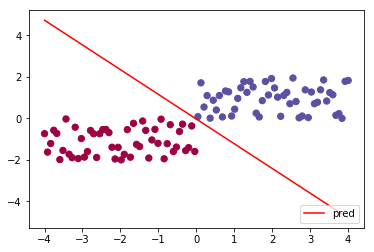

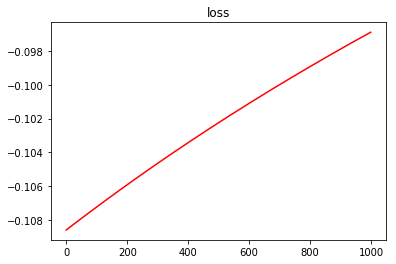

In [15]:
x_list, y_list, w, b = get_regression_sample_data()
print(w,b)
lr = 0.001
epoch = 1000
Logistic_model = Logistic(x_list, y_list, lr)
loss_list = train(Logistic_model, epoch)

y_pred = Logistic_model.plot_forward(x_list[:,0])
plt.figure()
plt.scatter(x_list[:, 0], x_list[:, 1], c=y_list.reshape(-1), s=40, cmap=plt.cm.Spectral)
plt.plot(x_list[:,0], y_pred, 'r', label='pred')
plt.legend(loc='lower right')
plt.show()
    
plt.figure()
plt.plot(np.arange(epoch), loss_list, 'r')
plt.title('loss')
plt.show()